In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb

In [61]:
statements = pd.read_csv('ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/scp_statements.csv')

In [62]:
statements

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
67,AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
68,SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290
69,PSVT,paroxysmal supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,paroxysmal supraventricular tachycardia,NaN,MDC_ECG_RHY_SV_TACHY_PAROX,NaN,NaN


In [63]:
db = pd.read_csv('ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv')

In [67]:
db.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [122]:
sub_db = db[['ecg_id', 'age', 'sex', 'report', 'scp_codes', 'heart_axis', 'infarction_stadium1', 'infarction_stadium2', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker']]

In [135]:
sub_db[db.report.str.startswith('sinusrhythmus lagetyp normal t')]

,ecg_id,age,sex,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker
1191,1204,54.0,1,sinusrhythmus lagetyp normal t abnorm in infer...,"{'NORM': 50.0, 'SR': 0.0}",MID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1275,1288,45.0,0,sinusrhythmus lagetyp normal t abnorm in infer...,"{'NDT': 100.0, 'SR': 0.0}",MID,NaN,NaN,", I-AVR",", I-V1,",NaN,NaN,NaN,NaN
1476,1489,72.0,0,"sinusrhythmus lagetyp normal t flach in v1, bi...","{'NST_': 100.0, 'SR': 0.0}",MID,NaN,NaN,NaN,", mittel,",NaN,NaN,NaN,NaN
2157,2170,76.0,1,sinusrhythmus lagetyp normal t biphasisch in v...,"{'NDT': 100.0, 'SR': 0.0}",MID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2706,2721,71.0,1,sinusrhythmus lagetyp normal t abnorm in hochl...,"{'NORM': 100.0, 'SR': 0.0}",MID,NaN,NaN,NaN,", I-AVR,",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21381,21420,68.0,1,sinusrhythmus lagetyp normal t abnorm in anter...,"{'ISCAS': 100.0, 'SR': 0.0}",MID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21523,21562,64.0,0,sinusrhythmus lagetyp normal t abnorm in anter...,"{'IMI': 15.0, 'ISCAS': 100.0, 'SR': 0.0}",MID,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21720,21759,55.0,0,sinusrhythmus lagetyp normal t abnorm in anter...,"{'INJAS': 100.0, 'SR': 0.0}",MID,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21777,21816,62.0,1,sinusrhythmus lagetyp normal t abnorm in hochl...,"{'NDT': 100.0, 'SR': 0.0}",MID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
db[db.ecg_id == 21420].report.iloc[0]

'sinusrhythmus lagetyp normal t abnorm in anterioren ableitungen 4.46                          unbestÄtigter bericht'

In [96]:
def plot(signals, fields, ylim=2):
    fig, ax = plt.subplots(12, sharex=True, figsize=(10, 12))
    fig.subplots_adjust(hspace=0)
    for i in range(signals.shape[1]):
        ax[i].plot(signals[:,i])
        ax[i].set_ylabel(fields['sig_name'][i], rotation=0)
        ax[i].yaxis.set_label_coords(-0.03, 0.5)
        ax[i].set_ylim((-ylim, ylim))
        ax[i].set_yticks([])

def plotID(i, ylim=2):
    dir = str(i // 1000 * 1000).zfill(5)
    num = str(i).zfill(5)
    filename = f'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/{dir}/{num}_lr'
    print(filename)
    signals, fields = wfdb.rdsamp(filename)
    plot(signals, fields, ylim)

ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/21000/21420_lr


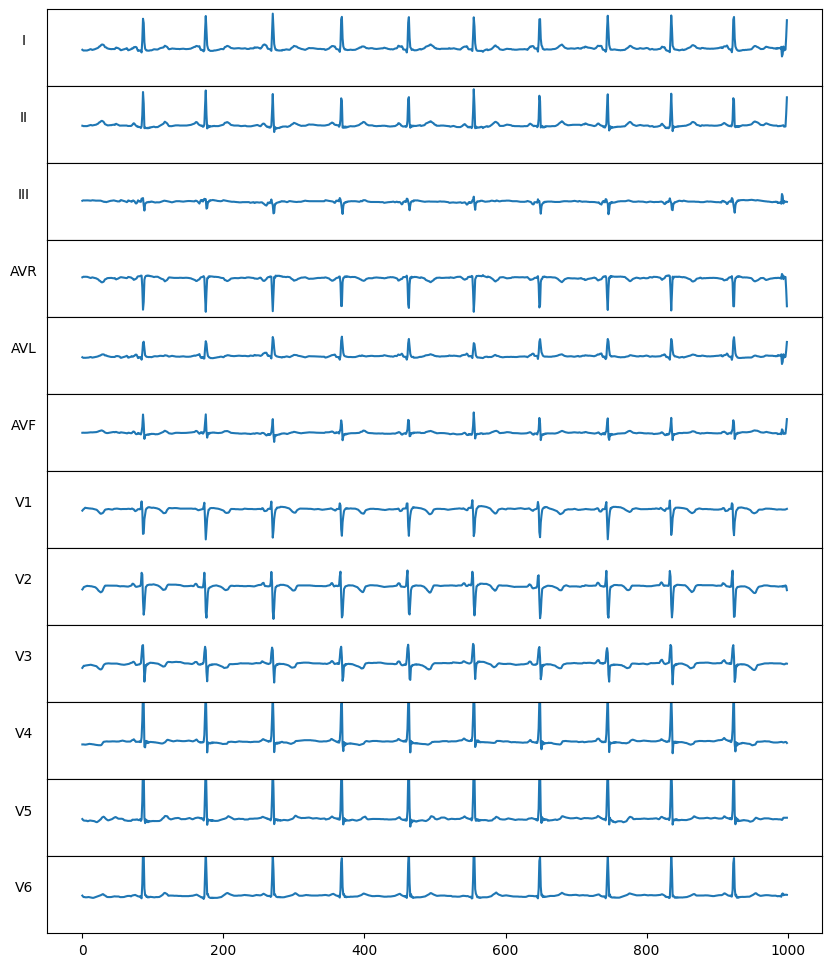

In [156]:
plotID(21420, ylim=1)

* (4) normal with baseline drift in II, III, AVF
* (15465) normal with baseline drift in V6
* (16145) normal
* (5370) normal
* (2399) normal
* (1301) normal
* (219) ventrikulÄre extrasystole(n) sinusrhythmus linkstyp vorhofsueberlastung links
* (21827) LAD; Stadium II, III; ventrikulÄre extrasystole(n), trigeminus supraventrikulÄre arrhythmie p-verbreiterung linkstyp qrs(t) abnorm    inferiorer infarkt     wahrscheinlich alt st & t abnorm, wahrscheinlich    laterale ischÄmie oder linksbelastung t abnorm in anterioren ableitu
* (181) baseline drift in V6; ventrikulÄr(a) extrasystoli(er) fÖrmaksflimmer med hÖg kammarfrekvens extrem vÄnster el-axel avvikande qrs(t) fÖrlopp    anterior infarkt     mÖjligen fÄrsk    inferior infarkt     sannolikt Äldre st-t sÄnkning, sÅsom vid    hÖg lateral ischemi eller vÄns
* (21420) MID; sinusrhythmus lagetyp normal t abnorm in anterioren ableitungen 4.46                          unbestÄtigter bericht